#  Lab Assignment Four: Evaluation and Multi-Layer Perceptron


####  Member : Yang Shen

# Business Understanding

This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. This dataset contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event. I filter the dataset to only focus on the USA team data. It will reduce the size of the dataset to 14214 rows. The columns are:

- ID - Unique number for each athlete each event
- Name - Athlete's name
- Sex – M (1) or F(0)
- Age - Integer
- Height - In centimeters
- Weight - In kilograms
- NOC – Nation name 3-letter code (USA)
- Year - Integer
- Season – Summer (0) or Winter(1)
- City - Host city (convert to numeric)
- Sport – Sport event name (convert to numeric)
- Medal – Gold (3), Silver(2), Bronze(1), or No(0)

My task is to classify which medal will athlete get or not. When the Olympic games hold, people will be really excited about it and watch the games on tv or the internet. Everyone is guessing who will get the gold medal. The party who interested in my study is the sports channel. They can use my study to predict or classifier who will get which medal. 

In China, No.5 sports channel has Prize Quiz which allows people in front of the tv to guess who will get the gold medal, silver and so on. It worked like the gamble, it has odds. The odds will be determined by classification. If one athlete we predict is gold, we will set the odds of gold low. Which means that this athlete has a high chance to win the gold medal. If you guess correctly with low odds, you will not win too much. The same story for an athlete we predict will not get any medal. He/she will have higher odds if he/she gets a medal. I you are correct, you will win more. Because we predict him as no medal, so we set odds high.

What I will do is base on the data that sport channel provided, I will put them in my Multi-Layer Perceptron model and give back the prediction of medals to sport channel. They will set the odds base on my predictions. Hope my model work.

The precision of my model should be high, I think 80% is good. If the precision is too low, the tv channel will lose money because of the odds-setting. The true positive rate should also as high as possible, maybe 80%. The false positive rate should be low in order to avoid high odds on the athlete who has a low chance to get a medal. I think 10% of false positive is good. I do not really know how to set odds, leave it to professional people. My task is classified(prediction) athlete to different medal or no medal.

My precision will add weighted on it with TP 0.4 and FP 0.6, there will be more detail of my metric below.

This model does not need to run so fast, because the sports channel can get the athlete data before the event. But it needs to be high precision.

# Data Description

In [1]:
#https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
# load the dataset
import pandas as pd
import numpy as np

print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

dfraw = pd.read_csv('https://raw.githubusercontent.com/sy0701611/lab-3/master/athlete_events.csv',error_bad_lines=False) 
# read in the csv file,offending lines to be skipped
dfraw.dropna(inplace=True)#drop all na value beacsue row with na is not useful
dfraw.head() 

Pandas: 0.24.2
Numpy: 1.16.2


,ID,name,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Medal
0,6,Per Knut Aaland,1,31,188,75.0,USA,1992,Winter,Albertville,Cross Country Skiing,0
1,6,Per Knut Aaland,1,31,188,75.0,USA,1992,Winter,Albertville,Cross Country Skiing,0
2,6,Per Knut Aaland,1,31,188,75.0,USA,1992,Winter,Albertville,Cross Country Skiing,0
3,6,Per Knut Aaland,1,31,188,75.0,USA,1992,Winter,Albertville,Cross Country Skiing,0
4,6,Per Knut Aaland,1,33,188,75.0,USA,1994,Winter,Lillehammer,Cross Country Skiing,0


In [2]:
#general information about the raw dataset.
print('===========')
print(dfraw.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14214 entries, 0 to 14213
Data columns (total 12 columns):
ID        14214 non-null int64
name      14214 non-null object
Sex       14214 non-null int64
Age       14214 non-null int64
Height    14214 non-null int64
Weight    14214 non-null float64
NOC       14214 non-null object
Year      14214 non-null int64
Season    14214 non-null object
City      14214 non-null object
Sport     14214 non-null object
Medal     14214 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 1.4+ MB
None


I drop ID becasue ID here is meaningless, can not help with classification. NOC is drpped because it is all USA. Also the name is useless. The year is also not helpful, because this is not time serise problem, we can treat each year as a individual event and last year event will not effect the next year.

In [368]:
# data type and information
# subset i am interested
#change category variable to numeric, and drop the old variables
import warnings
warnings.filterwarnings('ignore')

df = dfraw[['Sex','Age','Height','Weight','Season','Sport','Medal','City']]
df.City = pd.Categorical(df.City)
df['Citycode'] = df.City.cat.codes
df.Sport = pd.Categorical(df.Sport)
df['Sportcode'] = df.Sport.cat.codes
df.Season = pd.Categorical(df.Season)
df['Seasoncode'] = df.Season.cat.codes
df = df.drop("Season", axis=1)
df = df.drop("Sport", axis=1)
df = df.drop("City", axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14214 entries, 0 to 14213
Data columns (total 8 columns):
Sex           14214 non-null int64
Age           14214 non-null int64
Height        14214 non-null int64
Weight        14214 non-null float64
Medal         14214 non-null int64
Citycode      14214 non-null int8
Sportcode     14214 non-null int8
Seasoncode    14214 non-null int8
dtypes: float64(1), int64(4), int8(3)
memory usage: 707.9 KB
None


The new variable I created is just convert category variables to numeric. Which is city, sport and season. Numeric variable will be easy to analysis in our model.

In [369]:
# find the duplicate 
idx = df.duplicated()
len(df[idx])

3023

Do not drop duplicate value becasue in sport, player's weight and other parameter are similar. Also some player can join mutiple events in one Olympics. So duplicate value can not be dropped.

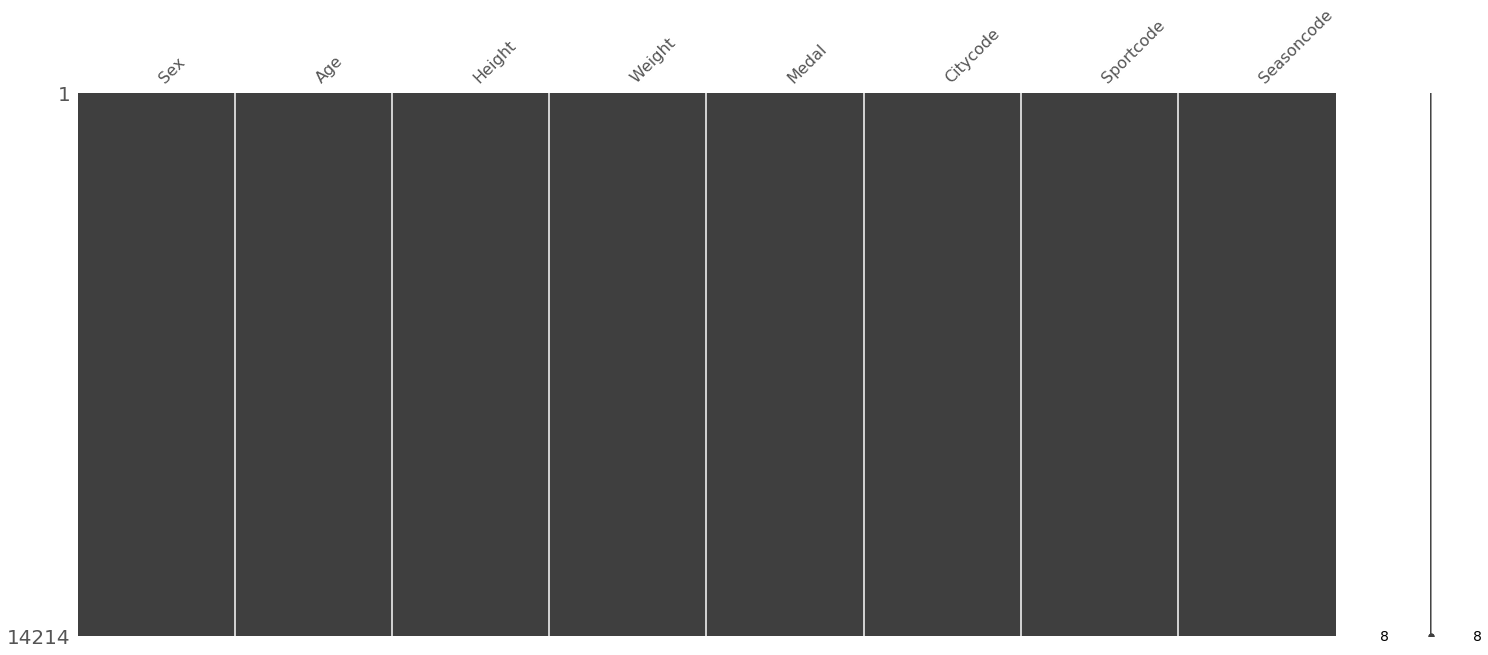

In [446]:
# plot missing variable
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

mn.matrix(df.sort_values(by=["Citycode",]))

No missing value which is good, we already drop them at the beginning.

In [447]:
print(df.info())
df.head() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14214 entries, 0 to 14213
Data columns (total 8 columns):
Sex           14214 non-null int64
Age           14214 non-null int64
Height        14214 non-null int64
Weight        14214 non-null float64
Medal         14214 non-null int64
Citycode      14214 non-null int8
Sportcode     14214 non-null int8
Seasoncode    14214 non-null int8
dtypes: float64(1), int64(4), int8(3)
memory usage: 707.9 KB
None


,Sex,Age,Height,Weight,Medal,Citycode,Sportcode,Seasoncode
0,1,31,188,75.0,0,0,12,1
1,1,31,188,75.0,0,0,12,1
2,1,31,188,75.0,0,0,12,1
3,1,31,188,75.0,0,0,12,1
4,1,33,188,75.0,0,16,12,1


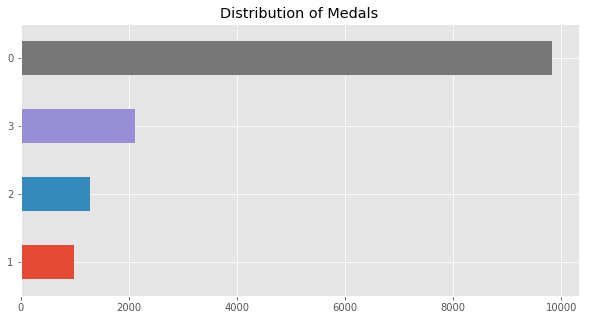

In [448]:
plt.style.use('ggplot')

plt.figure(figsize=(10,5))
dfraw['Medal'].value_counts(sort=True,ascending=True).plot(kind='barh')
plt.title('Distribution of Medals')

plt.show()

Gold (3), Silver(2), Bronze(1), or No(0)

We can see that for the most of time, athlete will not get medal. USA team get more gold than other medal is really impressive.

In [370]:
#standard scalar to normalized the data
X = df.drop("Medal", axis=1).as_matrix()
y = df["Medal"].as_matrix()
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
#using standard scalar to normalized the data
scaler = StandardScaler()
print(scaler.fit(X))
StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.transform(X)
#this test and train is just for testing whether my model is working or not.
#I will have StratifiedKFold in following code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

StandardScaler(copy=True, with_mean=True, with_std=True)


# Method for dividing training and testing

I used StratifiedKFold method to split my train/test set. From the medal class distribution, we can see that the no medal class is way more than other three class. The sum of other three medals is about half number of no medal class. This dataset is imbalanced. It is possible that in a fold, there is all no medal class. So that it will have 100% score. We should not use Kfold. Instead, we should use stratifiedKfold. Stratification will rearrang the data as to ensure each fold is a good representative of the whole dataset. So that in each fold, the each medal class will have the same proportion as the whole dataset. I set the number of fold to 10, becasue of fold is too less, we can not find out if they are statistically different.

# Metric

In my case, I choose weighted precision as my metric. 

Precision will tell me whether the classifier was correct or not. High precision means you can trust that the model. In my case, the sports channel wants to predict whether the player will get a medal or not and which medal. High precision means that for the most of time, my classifier will get the correct result. The precision is calculating by TP/(TP+FP), I want a true positive rate as high as possible and false positive as low as possible. Because false positive means that my prediction is wrong, and the sports channel will set the wrong odds which might cause them to lose money. So that I using weighted precision, I set the weight of TP to 0.4 and weight to FP to 0.6. I do not know that weight ratio will be appropriate for my model, but I set FP more weight because I do not want it to be high. The confusion I do not really want to be high which is FP, I need to set it big as Dr. Larson mention in the townhall. 

# Model

## Original template (do not run)

In [74]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import pandas as pd
import sys

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0,size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W
        
        W2_num_elems = (self.n_hidden + 1)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden + 1)
        return W1, W2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2):
        """Compute feedforward step
        """
        A1 = self._add_bias_unit(X, how='column')
        A1 = A1.T
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = -2*(Y_enc-A3)*A3*(1-A3)  # last layer sensitivity
        V1 = A2*(1-A2)*(W2.T @ V2) # back prop the sensitivity 
        
        grad2 = V2 @ A2.T # no bias on final layer
        grad1 = V1[1:,:] @ A1.T # dont back prop sensitivity of bias
        
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred

In [75]:
from sklearn.metrics import accuracy_score
# just start with the vectorized version and minibatch
class TLPMiniBatch(TwoLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
        
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()

        delta_W1_prev = np.zeros(self.W1.shape)
        delta_W2_prev = np.zeros(self.W2.shape)

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2)
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, 
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2)

                # momentum calculations
                delta_W1, delta_W2 = self.eta * grad1, self.eta * grad2
                self.W1 -= (delta_W1 + (self.alpha * delta_W1_prev))
                self.W2 -= (delta_W2 + (self.alpha * delta_W2_prev))
                delta_W1_prev, delta_W2_prev = delta_W1, delta_W2

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            
        return self

# My template (running here)

In [356]:
# Starting with the implementation of the two layer perception from
# https://github.com/eclarson/MachineLearningNotebooks/blob/master/07.%20MLP%20Neural%20Networks.ipynb

# Below is a modified implementation for multiple layers

class MultiLayerPerceptron(object):
    def __init__(self, n_hidden=30, n_layers=2,
                 C=0.0, epochs=500, eta=0.001,
                 cost_function='quadratic', activation='sigmoid'):
        
        self.n_hidden = n_hidden
        self.n_layers = n_layers
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.cost_function = cost_function
        self.activation = activation
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        Ws = [None]*(self.n_layers) #here n_layer will be how many layer we want
        for i in range(self.n_layers): #range of layer, if layer is 2, range will be 0, 1, 2
            #0 is the first layer, 1 is the second layer, 2 is output, 
            #it will be used in feed forward, because we need calculate A3 output, 
            #here we do not need W3(W[i=2]), so i change to self.n_layers-1
            if i==0: #first layer, copy the code from original W1
                Wi_num_elems = (self.n_features_ + 1)*self.n_hidden
                Wi = np.random.uniform(-1.0, 1.0,size=Wi_num_elems)
                Wi = Wi.reshape(self.n_hidden, self.n_features_ + 1)  # reshape to be W
                
            elif i==self.n_layers-1: #this represent the layer before output (I call it   "final layer"  )
                #code copy from original W2 
                Wi_num_elems = (self.n_hidden + 1)*self.n_output_
                Wi = np.random.uniform(-1.0, 1.0,size=Wi_num_elems)
                Wi = Wi.reshape(self.n_output_, self.n_hidden + 1)
            else: # for all other situations, which is the hidden(middle) layers not include first and final layer
                # set them as the same as first layer
                Wi_num_elems = (self.n_hidden + 1)*self.n_hidden
                Wi = np.random.uniform(-1.0, 1.0,size=Wi_num_elems)
                Wi = Wi.reshape(self.n_hidden, self.n_hidden + 1)
            Ws[i] = Wi #this is the weights for muti layer
        return Ws
    


    
    def _activation(self,z):
        if self.activation=='sigmoid':
            return expit(z)
        elif self.activation=='linear':
            return z
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, Ws):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        #return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
        sumsqrt = 0
        for Wj in Ws:#changed from original, do a for loop to aggregate the np.mean(Ws)
            sumsqrt += np.mean(Wj[:, 1:]**2)
        return (lambda_/2.0) * np.sqrt(sumsqrt)
    
    def _cost(self,As,Y_enc,Ws):
        if self.cost_function=='quadratic':
            return self._quadratic_cost(As,Y_enc,Ws)
        elif self.cost_function=='crossentropy':
            return self._crossentropy_cost(As,Y_enc,Ws)
    
    def _quadratic_cost(self,As,Y_enc,Ws):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-As[-1])**2)#change A3 to As[-1]
        L2_term = self._L2_reg(self.l2_C, Ws)
        return cost + L2_term
    
    def _crossentropy_cost(self,As,Y_enc,Ws):#all A3 I replaced by As[-1]
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(As[-1])+(1-Y_enc)*np.log(1-As[-1])))) 
        L2_term = self._L2_reg(self.l2_C, Ws)
        return cost + L2_term
    
#https://github.com/Nchaos/Evaluation-and-Multi-Layer-Perceptron/blob/master/notebooks/Lab4_NC.ipynb    
    def _feedforward(self, X, Ws):
        """Compute feedforward step
        """
        As = [None]*(self.n_layers+1)#here we add 1 , becasue we have A3, 2 layer A1 A2 and additional A3, n_layers is only 2
        #As[i=2] still represent A3
        Zs = [None]*self.n_layers #if As and Zs are empty, I will get an error, said nonetype, so I can check where i am wrong
        for i in range(self.n_layers+1):#there we separate four situation, first player, second layer(final layer), layer in the middle, 
                                #and A3 which is output
            if i==0:# first layer, copy from original A1
                As[0] = self._add_bias_unit(X, how='column')
                As[0] = As[0].T
            else:# for Zs, I use [i-1] because there is no Z3(Zs[i=2]) 
                Zs[i-1] = Ws[i-1] @ As[i-1]
                #now i left is 1 and 2, [i-1] represent 0,1 which is the first layer Z1 and second layer Z2,
                if i!=self.n_layers:# this represent the middle layer plus final layer, 
                    #As[i=n_layers] is the output, i not equal to self.n_layers means output not included, 
                    #beacsue we do not add bias to the output
                    As[i] = self._activation(Zs[i-1])#activation function for all layer
                    As[i] = self._add_bias_unit(As[i], how='row')#add bias term
                else:#now Aoutput is only one left
                    As[i] = self._activation(Zs[i-1])#we do not add bios for this
        return As, Zs
    
    
    def _get_gradient(self, As, Zs, Y_enc, Ws):
        if self.cost_function=='quadratic':
            return self._quadratic_gradient(As,Zs,Y_enc,Ws)
        elif self.cost_function=='crossentropy':
            return self._crossentropy_gradient(As,Zs,Y_enc,Ws)
        
    def _quadratic_gradient(self, As, Zs, Y_enc, Ws):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        Vs = [None]*self.n_layers #V1-Vi
        grads = [None]*self.n_layers #grad1-gradi
        for i in range(self.n_layers,0,-1): 
            #range(self.n_layers,0,-1) = 2,1,0 in 2 layers situation, i change the order becasue we calculate V2 first, then V1
            if i==self.n_layers:#calculation of Vfinal(V2 in 2 layers)
                Vs[i-1] = -2*(Y_enc-As[-1])*As[-1]*(1-As[-1])#V[i=1] is V2 in here
                grads[i-1] = Vs[i-1] @ As[i-1].T
                grads[i-1][:, 1:] += Ws[i-1][:, 1:] * self.l2_C

            elif self.n_layers > 2 and i <= self.n_layers - 2 and i > 0:#for situation we have more than 2 layers
                #n_layers - 2 is the Vi s which is not include Voutput and Vfinal(V2 in 2 layer), i > 0 mean we do not need V0.
                #this line below is calculating the Vi for layer not V-final(V2 in 2 layer), and also not first layer(V0, we do not have V0)
                #in this situation, we need make some changes for 3 layer and more 
                if self.activation == 'sigmoid':
                    Vs[i-1] = As[i]*(1-As[i])*(Ws[i].T @ Vs[i][1:,:])# i use [1:,:] becasue we do not have V0, if i=1, Vs[i-1]=V0
                    #so i skip first row(skip V0), sometime i use it becsuse i need to skip first nonmeaning row
                elif self.activation == 'linear':
                    Vs[i-1] = (Ws[i].T @ Vs[i][1:,:]) #when we change phi function to linear, there is no A2*(1-A2) term
                grads[i-1] = Vs[i-1][1:,:] @ As[i-1].T
                grads[i-1][:, 1:] += Ws[i-1][:, 1:] * self.l2_C # regularize weights that are not bias terms
            else:#for two layer situation, we do not need to make any changes, just copy from Dr. Larson's code and modifed to Vs As format
                if self.activation == 'sigmoid':
                    Vs[i-1] = As[i]*(1-As[i])*(Ws[i].T @ Vs[i])
                elif self.activation == 'linear':
                    Vs[i-1] = (Ws[i].T @ Vs[i])
                grads[i-1] = Vs[i-1][1:,:] @ As[i-1].T
                grads[i-1][:, 1:] += Ws[i-1][:, 1:] * self.l2_C # regularize weights that are not bias terms
        return grads
    
    def _crossentropy_gradient(self, As, Zs, Y_enc, Ws):
        """ Compute gradient step using backpropagation.
        """
        
        Vs = [None]*self.n_layers
        grads = [None]*self.n_layers
        for i in range(self.n_layers,0,-1):
            if i== self.n_layers:#represent final layer, i only need to upgrade the final layer calculation,grad2
                Vs[i-1] = (As[-1]-Y_enc)#cross entropy, only difference between quadratic, other stay the same
                grads[i-1] = Vs[i-1] @ As[i-1].T
                grads[i-1][:, 1:] += Ws[i-1][:, 1:] * self.l2_C

            elif self.n_layers > 2 and i <= self.n_layers - 2 and i > 0:#for situation we have more than 2 layers
                #n_layers - 2 is the Vi s which is not include Voutput and Vfinal(V2 in 2 layer), i > 0 mean we do not need V0.
                #this line below is calculating the Vi for layer not V-final(V2 in 2 layer), and also not first layer(V0, we do not have V0)
                #in this situation, we need make some changes for 3 layer and more 
                if self.activation == 'sigmoid':
                    Vs[i-1] = As[i]*(1-As[i])*(Ws[i].T @ Vs[i][1:,:])# i use [1:,:] becasue we do not have V0, if i=1, Vs[i-1]=V0
                    #so i skip first row(skip V0)
                elif self.activation == 'linear':
                    Vs[i-1] = (Ws[i].T @ Vs[i][1:,:]) #when we change phi function to linear, there is no A2*(1-A2) term
                grads[i-1] = Vs[i-1][1:,:] @ As[i-1].T
                grads[i-1][:, 1:] += Ws[i-1][:, 1:] * self.l2_C # regularize weights that are not bias terms
            else:#for two layer situation, we do not need to make any changes, just copy from Dr. Larson's code and modifed to Vs As format
                if self.activation == 'sigmoid':
                    Vs[i-1] = As[i]*(1-As[i])*(Ws[i].T @ Vs[i])
                elif self.activation == 'linear':
                    Vs[i-1] = (Ws[i].T @ Vs[i])
                grads[i-1] = Vs[i-1][1:,:] @ As[i-1].T
                grads[i-1][:, 1:] += Ws[i-1][:, 1:] * self.l2_C # regularize weights that are not bias terms
        return grads
        
    
    def predict(self, X):
        """Predict class labels"""
        As,_ = self._feedforward(X, self.Ws)
        y_pred = np.argmax(As[-1], axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.Ws = self._initialize_weights()
        #gradients holds the gradients at each layer and iteration, but does not correctly separate them for some reason
        
        
        self.cost_ = []
        for i in range(self.epochs):

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            As, Zs = self._feedforward(X_data,self.Ws)
            
            cost = self._cost(As[-1],Y_enc,self.Ws)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            grads = self._get_gradient(As=As, Zs=Zs, Y_enc=Y_enc,
                                              Ws=self.Ws)
            #there is code for magnitude of gradient, base on the ica3, I using a for loop to append all mean gradient by layers by epochs
            for j in range(len(self.Ws)):
                self.Ws[j] -= self.eta * grads[j]
                self.grad_ws_[j].append(np.mean(grads[j])) 
                
        self.grad_ws_ =[None]*self.n_layers    
        for i in range(self.n_layers):    
            #reshape the append to a array format
            self.grad_ws_[i] = np.array(self.grad_ws_[i]).reshape(len(self.grad_ws_[i]))
            
        return self
    
    # The following params are to enable compatibility with GridSearchCV
    #https://github.com/Thakugan/machine-learning-notebooks/blob/master/5-evaluation-and-multi-layer-perceptron/mlp-contraceptive-method.ipynb
    #https://stackoverflow.com/questions/49716778/sklearn-define-get-params-automatically
    def get_params(self, deep=True):#for this part, we need to get the parameters, set each parameters value to self.
        #if we do not do this, in our cross validation part, we will get error said, need get_params
        return {"cost_function": self.cost_function, 
                "activation": self.activation, 
                "n_layers": self.n_layers,
                "C": self.l2_C, 
                "epochs": self.epochs, 
                "eta": self.eta, 
                "n_hidden": self.n_hidden
                
               }
    #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV.set_params
    #https://stackoverflow.com/questions/49716778/sklearn-define-get-params-automatically
    def set_params(self, **parameters):#after we get params, we need to set params, this for loop will help to calculate all combos
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
            
        return self
    
    #here is the source code from sklearn.model_selection.GridSearchCV
    #the above code is base on the get_params and set_params, base on that, I modified it and also give credict to github.com/Thakugan
    #all the sources give me the idea how to solve the problem
    #def set_params(self, **params):
    #for key, value in params.items():
    #        key, delim, sub_key = key.partition('__')
    #        if key not in valid_params:
    #           raise ValueError('Invalid parameter %s for estimator %s. '
    #                           'Check the list of available parameters '
    #                          'with `estimator.get_params().keys()`.' %
    #                         (key, self))

    #        if delim:
    #           nested_params[key][sub_key] = value
    #      else:
    #          setattr(self, key, value)
    
    def score(self, X, y):#custom score metric
        y_hat = self.predict(X)
        return custom_score(y, y_hat)  

# Testing one combo on iris dataset

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import plotly
from sklearn.metrics import accuracy_score, f1_score
from scipy.special import expit
import sys
import pandas as pd

ds = load_iris()
X = ds.data
y = ds.target
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
#using standard scalar to normalized the data
scaler = StandardScaler()
print(scaler.fit(X))
StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


StandardScaler(copy=True, with_mean=True, with_std=True)


In [183]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import plotly
from sklearn.metrics import accuracy_score, f1_score
from scipy.special import expit
import sys
import pandas as pd

params = dict(n_hidden=50, 
              n_layers=2,
              C=0.1, 
              epochs=300,
              eta=0.001,  
              
              cost_function='crossentropy',
              activation='sigmoid')

In [184]:
%%time 
mlp = MultiLayerPerceptron(**params)
mlp.fit(X_train, y_train, print_progress=10)
yhat = mlp.predict(X_test)
print('Test acc:',accuracy_score(y_test,yhat))


Epoch: 300/300

Test acc: 0.25404644616467276
Wall time: 4.38 s


I tried different combo on iris data set and it is working. Next, moving on to my dataset.

# Implement on my dataset

In [71]:
params = dict(n_hidden=50, 
              n_layers=2,
              C=0.1, 
              epochs=300,
              eta=0.001, 
              cost_function='crossentropy',
              activation='linear')

In [72]:
%%time 
mlp = MultiLayerPerceptron(**params)
mlp.fit(X_train, y_train, print_progress=10)
yhat = mlp.predict(X_test)


Epoch: 300/300

Wall time: 2.24 s


In [72]:
#https://stats.stackexchange.com/questions/51296/how-do-you-calculate-precision-and-recall-for-multiclass-classification-using-co
from sklearn.metrics import confusion_matrix
#way of calculating precision for muti classification
#first find the confusion matrix
cm = confusion_matrix(y_test, yhat)
cm

array([[121, 825, 339, 681],
       [  7,  76,  37,  76],
       [  6,  99,  58,  94],
       [ 13, 174,  84, 152]], dtype=int64)

In [73]:
#calculating the precision for each class, and also add weight to each confusion, TP weight is 0.4, Fp weight is 0.6
#np.nan_to_num(x/y) will solve the problem if we have divisor = o, it happened, so add this to avoid error
precision0 = np.nan_to_num(cm[0,0]*0.4/(cm[0,0]*0.4+np.sum(cm[1:,0]*0.6)))
precision1 = np.nan_to_num(cm[1,1]*0.4 / (cm[0,1]*0.6+cm[2,1]*0.6+cm[3,1]*0.6+cm[1,1]*0.4))
precision2 = np.nan_to_num(cm[2,2]*0.4/(cm[0,2]*0.6+cm[1,2]*0.6+cm[3,2]*0.6+cm[2,2]*0.4))
precision3 = np.nan_to_num(cm[3,3]*0.4/(cm[0,3]*0.6+cm[1,3]*0.6+cm[2,3]*0.6+cm[3,3]*0.4))

In [80]:
#calculating the mean precision for all class, Gold (3), Silver(2), Bronze(1), or No(0)
precision = precision0+precision1+precision2+precision3
meanprec = precision/4
print('Weighted precision is ',meanprec)

Weighted precision is  0.24607613480795357


# Tune the hyper-parameters

In [5]:
#defined my own weighted precision score
def custom_score(y_true, y_predict):
    cm = confusion_matrix(y_true, y_predict)
    precision0 = np.nan_to_num(cm[0,0]*0.4/(cm[0,0]*0.4+np.sum(cm[1:,0]*0.6)))
    precision1 = np.nan_to_num(cm[1,1]*0.4 / (cm[0,1]*0.6+cm[2,1]*0.6+cm[3,1]*0.6+cm[1,1]*0.4))
    precision2 = np.nan_to_num(cm[2,2]*0.4/(cm[0,2]*0.6+cm[1,2]*0.6+cm[3,2]*0.6+cm[2,2]*0.4))
    precision3 = np.nan_to_num(cm[3,3]*0.4/(cm[0,3]*0.6+cm[1,3]*0.6+cm[2,3]*0.6+cm[3,3]*0.4))
    
    precision = [precision0,precision1,precision2,precision3]
    meanprec = np.mean(precision)
        
    
    return meanprec

ValueError: Axis limits cannot be NaN or Inf

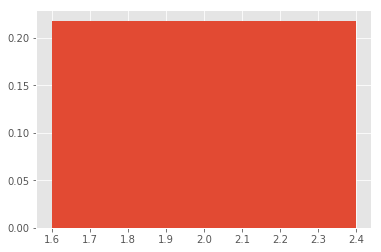

In [475]:
%%time
#StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# these imports above might help you

# select model
mlp = MultiLayerPerceptron()
#select cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True)
# select evaluation criteria
my_scorer = make_scorer(custom_score)
# run model training and cross validation

    
params = {
     'cost_function':('crossentropy', 'quadratic'),
    'activation':('linear', 'sigmoid'),
    'n_hidden': [50],
    'C': [0.1],
    'epochs': [200],
    'eta': [0.001],
    'n_layers': [2,3,4],
}
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
clf = GridSearchCV(mlp, params)

for train_index, test_index in cv.split(X,y): #Provides train/test indices to split data in train/test sets.
                                              #code from sklearn stratifiedKFold example
    X_train, X_test = X[train_index], X[test_index]#by doing this, I can get 10 split test score and 10 split train score.
    y_train, y_test = y[train_index], y[test_index]
    
per_fold_eval_criteria = cross_val_score(estimator=clf,
                                    X=X,
                                    y=y,
                                    cv=cv,
                                    scoring=my_scorer
                                   )

plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

Not work out, becasue there are too many variables, it will take me 10 mins and return with error, said too many axis. There are total 12 combos, each one will have 5 evaluation criteria, so the total number is 60, there is too many bar to plot, so I need to change the way. 

In [232]:
%%time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold.split
#This time, I will not plot directly, instead, I output the result from cv, and put it in a table dataframe
params = {
    'cost_function':('crossentropy', 'quadratic'),
    'activation':('linear', 'sigmoid'),
    'n_hidden': [50],
    'C': [0.1],
    'epochs': [300],
    'eta': [0.001],
    'n_layers': [2,3,4]
}
mlp = MultiLayerPerceptron()
cv = StratifiedKFold(n_splits=10, shuffle=True)
my_scorer = make_scorer(custom_score)
#code in this part is from sklearn stratifiedKFold example
for train_index, test_index in cv.split(X,y): #Provides train/test indices to split data in train/test sets.code from sklearn stratifiedKFold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV.get_params
clf = GridSearchCV(mlp, params, scoring=my_scorer, cv=cv,return_train_score=False) #the table will not show split0-4 test score 
        #becasue there is not enough space,but it is saved in dataframe, usee return_train_score=False will show all split test score
clf.fit(X, y)
#put the cv result in table dataframe format
result = pd.DataFrame(clf.cv_results_)
#add combo index
result['combo'] = np.linspace(0,len(result)-1,len(result))

Wall time: 14min 44s


I found cv_results_ on sklearn GridSearchCV.It will return me the time, my weighted precision score and all the parameters value i input. It will return with all 12 combo with 10 evaluation criteria(split0-9_train_score) and the mean test score. The mean test score is randed.

In [233]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_activation,param_cost_function,param_epochs,param_eta,param_n_hidden,...,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,combo
0,2.170543,0.030306,0.001538,0.000149,0.1,linear,crossentropy,300,0.001,50,...,0.171284,0.202715,0.202667,0.229058,0.195054,0.169767,0.206039,0.029361,3,0.0
1,4.387861,0.064287,0.048658,0.140352,0.1,linear,crossentropy,300,0.001,50,...,0.163328,0.169699,0.180389,0.234896,0.224598,0.199788,0.203739,0.038578,4,1.0
2,7.048155,1.132710,0.002282,0.000328,0.1,linear,crossentropy,300,0.001,50,...,0.209896,0.197575,0.174940,0.186779,0.167046,0.179451,0.187575,0.018939,6,2.0
3,2.048826,0.019350,0.001438,0.000267,0.1,linear,quadratic,300,0.001,50,...,0.177211,0.249117,0.132917,0.235663,0.231532,0.198238,0.202666,0.035398,5,3.0
4,4.146061,0.037822,0.001785,0.000397,0.1,linear,quadratic,300,0.001,50,...,0.187418,0.203383,0.248304,0.216772,0.236196,0.162679,0.217865,0.030500,1,4.0
5,6.231194,0.107300,0.002480,0.000314,0.1,linear,quadratic,300,0.001,50,...,0.162463,0.241086,0.230031,0.220817,0.186817,0.191089,0.209962,0.023992,2,5.0
6,5.575333,0.819124,0.002282,0.000329,0.1,sigmoid,crossentropy,300,0.001,50,...,0.042239,0.166752,0.269665,0.158844,0.191701,0.149976,0.125416,0.075705,8,6.0
7,10.370857,0.093146,0.003124,0.000446,0.1,sigmoid,crossentropy,300,0.001,50,...,0.149711,0.028646,0.023847,0.044725,0.145977,0.154656,0.079501,0.060355,12,7.0
8,15.306004,0.117422,0.004365,0.000534,0.1,sigmoid,crossentropy,300,0.001,50,...,0.011756,0.149848,0.011773,0.011773,0.198891,0.171237,0.090544,0.091151,10,8.0
9,5.061083,0.036115,0.002280,0.000242,0.1,sigmoid,quadratic,300,0.001,50,...,0.222667,0.220908,0.149985,0.200729,0.036752,0.209032,0.177665,0.055852,7,9.0


In [234]:
print(result.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 26 columns):
mean_fit_time          12 non-null float64
std_fit_time           12 non-null float64
mean_score_time        12 non-null float64
std_score_time         12 non-null float64
param_C                12 non-null object
param_activation       12 non-null object
param_cost_function    12 non-null object
param_epochs           12 non-null object
param_eta              12 non-null object
param_n_hidden         12 non-null object
param_n_layers         12 non-null object
params                 12 non-null object
split0_test_score      12 non-null float64
split1_test_score      12 non-null float64
split2_test_score      12 non-null float64
split3_test_score      12 non-null float64
split4_test_score      12 non-null float64
split5_test_score      12 non-null float64
split6_test_score      12 non-null float64
split7_test_score      12 non-null float64
split8_test_score      12 non-null float64
sp

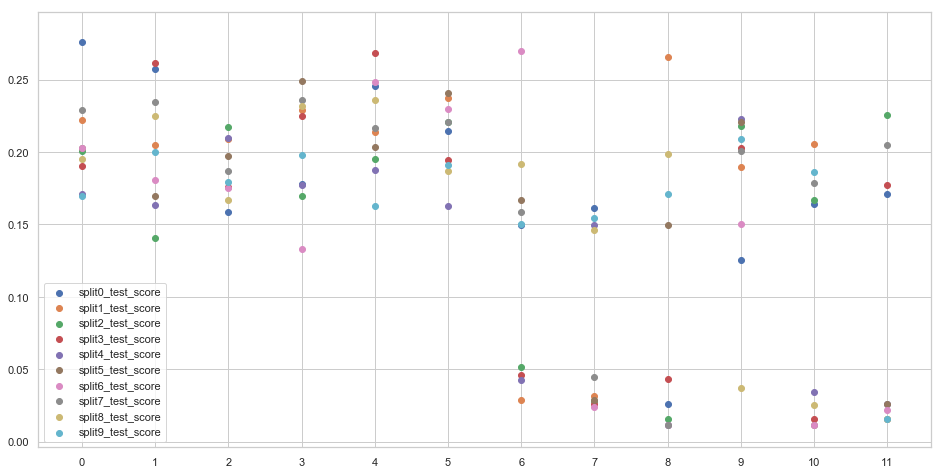

In [235]:
import numpy as np
import matplotlib.pyplot as plt
#https://matplotlib.org/gallery/lines_bars_and_markers/line_demo_dash_control.html#sphx-glr-gallery-lines-bars-and-markers-line-demo-dash-control-py
#main idea came from matplotlib example

x = result.combo
y0 = result.split0_test_score
y1 = result.split1_test_score
y2 = result.split2_test_score
y3 = result.split3_test_score
y4 = result.split4_test_score
y5 = result.split5_test_score
y6 = result.split6_test_score
y7 = result.split7_test_score
y8 = result.split8_test_score
y9 = result.split9_test_score
fig, ax = plt.subplots()

# Using set_dashes() to modify dashing of an existing line
fig.set_size_inches(16, 8)
plt.scatter(x, y0, label='split0_test_score')#change from line to scatter plot from original example
plt.scatter(x, y1, label='split1_test_score')
plt.scatter(x, y2, label='split2_test_score')
plt.scatter(x, y3, label='split3_test_score')
plt.scatter(x, y4, label='split4_test_score')
plt.scatter(x, y5, label='split5_test_score')
plt.scatter(x, y6, label='split6_test_score')
plt.scatter(x, y7, label='split7_test_score')
plt.scatter(x, y8, label='split8_test_score')
plt.scatter(x, y9, label='split9_test_score')
ax.set_xticks(np.arange(len(x)))
ax.legend()
plt.show()

In [304]:
cb0 = result.loc[result.combo == 0]
cb1 = result.loc[result.combo == 1]
cb2 = result.loc[result.combo == 2]
cb3 = result.loc[result.combo == 3]
cb4 = result.loc[result.combo == 4]
cb5 = result.loc[result.combo == 5]
cb6 = result.loc[result.combo == 6]
cb7 = result.loc[result.combo == 7]
cb8 = result.loc[result.combo == 8]
cb9 = result.loc[result.combo == 9]
cb10 = result.loc[result.combo == 10]
cb11 = result.loc[result.combo == 11]


In [305]:
#mean score for all combo, average score for 10 fold
cb0mean = (cb0.split0_test_score + cb0.split1_test_score+cb0.split2_test_score+cb0.split3_test_score
           +cb0.split4_test_score+cb0.split5_test_score+cb0.split6_test_score
           +cb0.split7_test_score+cb0.split8_test_score+cb0.split9_test_score)/10
cb0mean = cb0mean.values
cb1mean = (cb1.split0_test_score + cb1.split1_test_score+cb1.split2_test_score+cb1.split3_test_score
           +cb1.split4_test_score+cb1.split5_test_score+cb1.split6_test_score
           +cb1.split7_test_score+cb1.split8_test_score+cb1.split9_test_score)/10
cb1mean = cb1mean.values
cb2mean = (cb2.split0_test_score + cb2.split1_test_score+cb2.split2_test_score+cb2.split3_test_score
           +cb2.split4_test_score+cb2.split5_test_score+cb2.split6_test_score
           +cb2.split7_test_score+cb2.split8_test_score+cb2.split9_test_score)/10
cb2mean = cb2mean.values
cb3mean = (cb3.split0_test_score + cb3.split1_test_score+cb3.split2_test_score+cb3.split3_test_score
           +cb3.split4_test_score+cb3.split5_test_score+cb3.split6_test_score
           +cb3.split7_test_score+cb3.split8_test_score+cb3.split9_test_score)/10
cb3mean = cb3mean.values
cb4mean = (cb4.split0_test_score + cb4.split1_test_score+cb4.split2_test_score+cb4.split3_test_score
           +cb4.split4_test_score+cb4.split5_test_score+cb4.split6_test_score
           +cb4.split7_test_score+cb4.split8_test_score+cb4.split9_test_score)/10
cb4mean = cb4mean.values
cb5mean = (cb5.split0_test_score + cb5.split1_test_score+cb5.split2_test_score+cb5.split3_test_score
           +cb5.split4_test_score+cb5.split5_test_score+cb5.split6_test_score
           +cb5.split7_test_score+cb5.split8_test_score+cb5.split9_test_score)/10
cb5mean = cb5mean.values
cb6mean = (cb6.split0_test_score + cb6.split1_test_score+cb6.split2_test_score+cb6.split3_test_score
           +cb6.split4_test_score+cb6.split5_test_score+cb6.split6_test_score
           +cb6.split7_test_score+cb6.split8_test_score+cb6.split9_test_score)/10
cb6mean = cb6mean.values
cb7mean = (cb7.split0_test_score + cb7.split1_test_score+cb7.split2_test_score+cb7.split3_test_score
           +cb7.split4_test_score+cb7.split5_test_score+cb7.split6_test_score
           +cb7.split7_test_score+cb7.split8_test_score+cb7.split9_test_score)/10
cb7mean = cb7mean.values
cb8mean = (cb8.split8_test_score + cb8.split1_test_score+cb8.split2_test_score+cb8.split3_test_score
           +cb8.split4_test_score+cb8.split5_test_score+cb8.split6_test_score
           +cb8.split7_test_score+cb8.split8_test_score+cb8.split9_test_score)/10
cb8mean = cb8mean.values
cb9mean = (cb9.split8_test_score + cb9.split1_test_score+cb9.split2_test_score+cb9.split3_test_score
           +cb9.split4_test_score+cb9.split5_test_score+cb9.split6_test_score
           +cb9.split7_test_score+cb9.split8_test_score+cb9.split9_test_score)/10
cb9mean = cb9mean.values
cb10mean = (cb10.split8_test_score + cb10.split1_test_score+cb10.split2_test_score+cb10.split3_test_score
           +cb10.split4_test_score+cb10.split5_test_score+cb10.split6_test_score
           +cb10.split7_test_score+cb10.split8_test_score+cb10.split9_test_score)/10
cb10mean = cb10mean.values
cb11mean = (cb11.split8_test_score + cb11.split1_test_score+cb11.split2_test_score+cb11.split3_test_score
           +cb11.split4_test_score+cb11.split5_test_score+cb11.split6_test_score
           +cb11.split7_test_score+cb11.split8_test_score+cb11.split9_test_score)/10
cb11mean = cb11mean.values

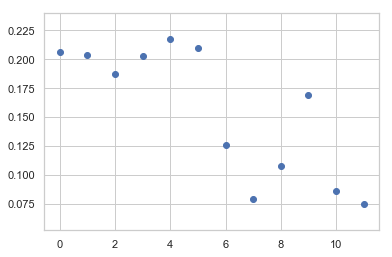

In [310]:
#mean score for all combo
xc = [cb0mean,cb1mean,cb2mean,cb3mean,cb4mean,cb5mean,cb6mean,cb7mean,cb8mean,cb9mean,cb10mean,cb11mean]
s = np.stack(xc, axis=0 )

plt.scatter(x = result.combo, y=s)

Base on the plot, I have few potential good combo, which are 4,5. I need to make some calculation to decide whether they are statistically different from each other. 

In [311]:
#Statistical Comparison
clf4 = MultiLayerPerceptron(n_hidden=50, 
              n_layers=3,
              C=0.1, 
              epochs=300,
              eta=0.001, 
              cost_function='quadratic',
              activation='linear')
clf5 = MultiLayerPerceptron(n_hidden=50, 
              n_layers=4,
              C=0.1, 
              epochs=300,
              eta=0.001, 
              cost_function='quadratic',
              activation='linear')


rec4 = cross_val_score(estimator=clf3,X=X,y=y,scoring=my_scorer,cv=cv)
rec5 = cross_val_score(estimator=clf5,X=X,y=y,scoring=my_scorer,cv=cv)

t = 2.26 / np.sqrt(10)
e = (1-rec4)-(1-rec5)
stdtot =np.std(e)

dbar = np.mean(e)
print('range of 4&5 :',dbar-t*stdtot,dbar+t*stdtot)

range of 4&5 : -0.03955979809836739 0.00207041487570242


In [413]:
print('combo4 weighted precision ',cb4mean)

combo4 weighted precision  [0.21785888]


Becasue the range is include 0, so we can not say that with 95% confident level, combo4 and comba5 are statisitcally different.

Base on statistical comparison result, we can not say they are statistical different from each other. So that I will still choose **combo 4**, which is **50 hidden layers, 3 layer,C=0.1, epochs=300,eta=0.001, cost_function='quadratic',activation='linear'**.
I choose combo 4 because it have high average test score. But all combo have really low precision score, below 0.30. So non of combo is meet the business case. So I do not need to select the best model.

If I really need 'best' model, I choose combo4.

# Visualize the magnitude of the gradients in each layer

In [382]:
params = dict(n_hidden=50, 
              n_layers=3,
              C=0.1, 
              epochs=300,
              eta=0.001,  
              
              cost_function='quadratic',
              activation='linear')

clf4 = MultiLayerPerceptron(**params)

clf4.fit(X_train, y_train, print_progress=10)

Epoch: 300/300

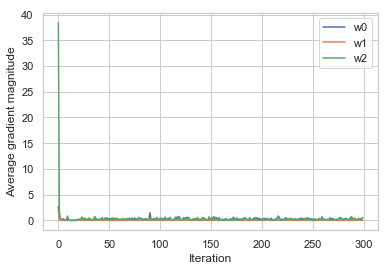

In [390]:
ax = plt.subplot(1,1,1)
for i in range(0,params['n_layers']):
    plt.plot(np.abs(clf4.grad_ws_[i]), label='w' + str(i) )
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.show()

After show the plot of magnitude of the gradients in each layer of the neural network versus the training iteration. I found that at the beginning, all gradient are kind of high. Then they trend to reach the botten with little up and down movement. I think the gradients stay consistent in each layer as the iteration increase.

# Sklearn comparision

In [403]:
from sklearn.neural_network import MLPClassifier

#our params
params = {
    'cost_function':('quadratic'),
    'nonlinearity_function':('linear'),
    'n_hidden': [50],
    'C': [0.01],
    'epochs': [300],
    'eta': [0.001],
}

#sklearn 
sklearn = MLPClassifier(hidden_layer_sizes=(50, ), 
                    activation='identity', #linear
                    solver='sgd', #stochastic gradient descent.
                    alpha=1e-4,  
                    shuffle=True) # adam numerical stabilizer

cltme = MultiLayerPerceptron()

In [404]:
%%time
sklearn.fit(X_train,y_train)

Wall time: 354 ms


MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [412]:
yhat_sl=sklearn.predict(X_test)
print("Sklearn Score: ", custom_score(y_test, yhat_sl))

Sklearn Score:  0.26439912826899126


In [406]:
%%time
cltme.fit(X_train,y_train)

Wall time: 5.42 s


In [410]:
yhat_me=cltme.predict(X_test)
print("My Score:", custom_score(y_test, yhat_me))

My Score: 0.24819881440948474


With my weighted precision scoring method, Sklearn and my model have really close score. However my time is 15 times more than sklearn does.

# Exceptional Work

## ReLU and SiLU

In [323]:
class MultiLayerPerceptron(object):
    def __init__(self, n_hidden=30, n_layers=2,
                 C=0.0, epochs=500, eta=0.001,
                 cost_function='quadratic', activation='sigmoid'):
        
        self.n_hidden = n_hidden
        self.n_layers = n_layers
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.cost_function = cost_function
        self.activation = activation
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        Ws = [None]*(self.n_layers) #here n_layer will be how many layer we want
        for i in range(self.n_layers): #range of layer, if layer is 2, range will be 0, 1, 2
            #0 is the first layer, 1 is the second layer, 2 is output, 
            #it will be used in feed forward, because we need calculate A3 output, 
            #here we do not need W3(W[i=2]), so i change to self.n_layers-1
            if i==0: #first layer, copy the code from original W1
                Wi_num_elems = (self.n_features_ + 1)*self.n_hidden
                Wi = np.random.uniform(-1.0, 1.0,size=Wi_num_elems)
                Wi = Wi.reshape(self.n_hidden, self.n_features_ + 1)  # reshape to be W
                
            elif i==self.n_layers-1: #this represent the layer before output (I call it   "final layer"  )
                #code copy from original W2 
                Wi_num_elems = (self.n_hidden + 1)*self.n_output_
                Wi = np.random.uniform(-1.0, 1.0,size=Wi_num_elems)
                Wi = Wi.reshape(self.n_output_, self.n_hidden + 1)
            else: # for all other situations, which is the hidden(middle) layers not include first and final layer
                # set them as the same as first layer
                Wi_num_elems = (self.n_hidden + 1)*self.n_hidden
                Wi = np.random.uniform(-1.0, 1.0,size=Wi_num_elems)
                Wi = Wi.reshape(self.n_hidden, self.n_hidden + 1)
            Ws[i] = Wi #this is the weights for muti layer
        return Ws
    
    
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    def _silu(z):#not useful
        return z*expit(z)
    
    #add relu and silu
    def _activation(self,z):
        if self.activation=='sigmoid':
            return expit(z)
        elif self.activation=='linear':
            return z
        elif self.activation=='relu':
            return np.maximum(0,z.copy())
        #f(x)=x*sigmoid(x)
        elif self.activation=='silu':
            return z*expit(z)
        
    
        
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, Ws):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        #return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
        sumsqrt = 0
        for Wj in Ws:#changed from original, do a for loop to aggregate the np.mean(Ws)
            sumsqrt += np.mean(Wj[:, 1:]**2)
        return (lambda_/2.0) * np.sqrt(sumsqrt)
    
    def _cost(self,As,Y_enc,Ws):
        if self.cost_function=='quadratic':
            return self._quadratic_cost(As,Y_enc,Ws)
        elif self.cost_function=='crossentropy':
            return self._crossentropy_cost(As,Y_enc,Ws)
    
    def _quadratic_cost(self,As,Y_enc,Ws):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-As[-1])**2)#change A3 to As[-1]
        L2_term = self._L2_reg(self.l2_C, Ws)
        return cost + L2_term
    
    def _crossentropy_cost(self,As,Y_enc,Ws):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(As[-1])+(1-Y_enc)*np.log(1-As[-1])))) #change A3 to As[-1]
        L2_term = self._L2_reg(self.l2_C, Ws)
        return cost + L2_term
    
#https://github.com/Nchaos/Evaluation-and-Multi-Layer-Perceptron/blob/master/notebooks/Lab4_NC.ipynb    
    def _feedforward(self, X, Ws):
        """Compute feedforward step
        """
        As = [None]*(self.n_layers+1)#here we add 1 , becasue we have A3, 2 layer A1 A2 and additional A3, n_layers is only 2
        #As[i=2] still represent A3
        Zs = [None]*self.n_layers
        for i in range(self.n_layers+1):#there we separate four situation, first player, second layer(final layer), layer in the middle, 
                                #and A3 which is output
            if i==0:# first layer, copy from original A1
                As[0] = self._add_bias_unit(X, how='column')
                As[0] = As[0].T
            else:# for Zs, I use [i-1] because there is no Z3(Zs[i=2]) 
                Zs[i-1] = Ws[i-1] @ As[i-1]
                #now i left is 1 and 2, [i-1] represent 0,1 which is the first layer Z1 and second layer Z2,
                if i!=self.n_layers:# this represent the middle layer plus final layer, 
                    #As[i=n_layers] is the output, i not equal to self.n_layers means output not included, 
                    #beacsue we do not add bias to the output
                    As[i] = self._activation(Zs[i-1])#activation function for all layer
                    As[i] = self._add_bias_unit(As[i], how='row')#add bias term
                else:#now Aoutput is only one left
                    As[i] = self._sigmoid(Zs[i-1])#we do not add bios for this,# never use relu as last layer for classification
                    #so i use sigmoid,Silu is also use sigmoid base on the f(x) nad f'(x)
        return As, Zs
    
    
    def _get_gradient(self, As, Zs, Y_enc, Ws):
        if self.cost_function=='quadratic':
            return self._quadratic_gradient(As,Zs,Y_enc,Ws)
        elif self.cost_function=='crossentropy':
            return self._crossentropy_gradient(As,Zs,Y_enc,Ws)
        
    def _quadratic_gradient(self, As, Zs, Y_enc, Ws):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        Vs = [None]*self.n_layers
        grads = [None]*self.n_layers
        for i in range(self.n_layers,0,-1): 
            #range(self.n_layers,0,-1) = 2,1,0 in 2 layers situation, i change the order becasue we calculate V2 first, then V1
            if i==self.n_layers:#calculation of Vfinal(V2 in 2 layers)
                Vs[i-1] = -2*(Y_enc-As[-1])*As[-1]*(1-As[-1])#V[i=1] is V2 in here
                grads[i-1] = Vs[i-1] @ As[i-1].T
                grads[i-1][:, 1:] += Ws[i-1][:, 1:] * self.l2_C

            elif self.n_layers > 2 and i <= self.n_layers - 2 and i > 0:#for situation we have more than 2 layers
                #n_layers - 2 is the Vi s which is not include Voutput and Vfinal(V2 in 2 layer), i > 0 mean we do not need V0.
                #this line below is calculating the Vi for layer not V-final(V2 in 2 layer), and also not first layer(V0, we do not have V0)
                #in this situation, we need make some changes for 3 layer and more 
                if self.activation == 'sigmoid':
                    Vs[i-1] = As[i]*(1-As[i])*(Ws[i].T @ Vs[i][1:,:])# i use [1:,:] becasue we do not have V0, if i=1, Vs[i-1]=V0
                    #so i skip first row(skip V0)
                elif self.activation == 'linear':
                    Vs[i-1] = (Ws[i].T @ Vs[i][1:,:])
                elif self.activation == 'relu':#relu gradient here, base on Dr.larson code
                    Vs[i-1] = Ws[i].T @ Vs[i][1:,:]
                    Vs[i-1][1:,:][Zs[i-1]<=0] = 0
                elif self.activation == 'silu':#silu gradient here, base on Dr.larson code and silde 
                    #f'(x)=f(x)+sigmoid(x)*(1-f(x))
                    Vs[i-1] = Ws[i].T @ Vs[i][1:,:]
                    Vs[i-1][1:,:][Zs[i-1]<=0] = 0 #if we look at the slide plot, the silu is really like relu, x<0 is 0, x>0, 
                                                  #it will perform just like relu, so i used the same function as relu here
                grads[i-1] = Vs[i-1][1:,:] @ As[i-1].T
                grads[i-1][:, 1:] += Ws[i-1][:, 1:] * self.l2_C # regularize weights that are not bias terms
            else:#for two layer situation, we do not need to make any changes, just copy from Dr. Larson's code and modifed to Vs As format
                if self.activation == 'sigmoid':
                    Vs[i-1] = As[i]*(1-As[i])*(Ws[i].T @ Vs[i])
                elif self.activation == 'linear':
                    Vs[i-1] = (Ws[i].T @ Vs[i])
                elif self.activation == 'relu':#relu gradient here, base on Dr.larson code
                    Vs[i-1] = Ws[i].T @ Vs[i]
                    Vs[i-1][1:,:][Zs[i-1]<=0] = 0
                elif self.activation == 'silu':#silu gradient here, base on Dr.larson code and silde 
                    #f'(x)=f(x)+sigmoid(x)*(1-f(x))
                    Vs[i-1] = Ws[i].T @ Vs[i]
                    Vs[i-1][1:,:][Zs[i-1]<=0] = 0
                grads[i-1] = Vs[i-1][1:,:] @ As[i-1].T
                grads[i-1][:, 1:] += Ws[i-1][:, 1:] * self.l2_C # regularize weights that are not bias terms
        return grads
    
    def _crossentropy_gradient(self, As, Zs, Y_enc, Ws):
        """ Compute gradient step using backpropagation.
        """
        
        Vs = [None]*self.n_layers
        grads = [None]*self.n_layers
        for i in range(self.n_layers,0,-1):
            if i== self.n_layers:#represent final layer, i only need to upgrade the final layer calculation,grad2
                Vs[i-1] = (As[-1]-Y_enc)#cross entropy, only difference between quadratic, other stay the same
                grads[i-1] = Vs[i-1] @ As[i-1].T
                grads[i-1][:, 1:] += Ws[i-1][:, 1:] * self.l2_C

            elif self.n_layers > 2 and i <= self.n_layers - 2 and i > 0:#for situation we have more than 2 layers
                #n_layers - 2 is the Vi s which is not include Voutput and Vfinal(V2 in 2 layer), i > 0 mean we do not need V0.
                #this line below is calculating the Vi for layer not V-final(V2 in 2 layer), and also not first layer(V0, we do not have V0)
                #in this situation, we need make some changes for 3 layer and more 
                if self.activation == 'sigmoid':
                    Vs[i-1] = As[i]*(1-As[i])*(Ws[i].T @ Vs[i][1:,:])# i use [1:,:] becasue we do not have V0, if i=1, Vs[i-1]=V0
                    #so i skip first row(skip V0)
                elif self.activation == 'linear':
                    Vs[i-1] = (Ws[i].T @ Vs[i][1:,:]) 
                elif self.activation == 'relu':#relu gradient here, base on Dr.larson code
                    Vs[i-1] = Ws[i].T @ Vs[i][1:,:]
                    Vs[i-1][1:,:][Zs[i-1]<=0] = 0
                elif self.activation == 'silu':#silu gradient here, base on Dr.larson code and silde 
                    #f'(x)=f(x)+sigmoid(x)*(1-f(x))
                    Vs[i-1] = Ws[i].T @ Vs[i][1:,:]
                    Vs[i-1][1:,:][Zs[i-1]<=0] = 0
                grads[i-1] = Vs[i-1][1:,:] @ As[i-1].T
                grads[i-1][:, 1:] += Ws[i-1][:, 1:] * self.l2_C # regularize weights that are not bias terms
            else:#for two layer situation, we do not need to make any changes, just copy from Dr. Larson's code and modifed to Vs As format
                if self.activation == 'sigmoid':
                    Vs[i-1] = As[i]*(1-As[i])*(Ws[i].T @ Vs[i])
                elif self.activation == 'linear':
                    Vs[i-1] = (Ws[i].T @ Vs[i])
                elif self.activation == 'relu':#relu gradient here, base on Dr.larson code
                    Vs[i-1] = Ws[i].T @ Vs[i]
                    Vs[i-1][1:,:][Zs[i-1]<=0] = 0
                elif self.activation == 'silu':#silu gradient here, base on Dr.larson code and silde 
                    #f'(x)=f(x)+sigmoid(x)*(1-f(x))
                    Vs[i-1] = Ws[i].T @ Vs[i]
                    Vs[i-1][1:,:][Zs[i-1]<=0] = 0
                grads[i-1] = Vs[i-1][1:,:] @ As[i-1].T
                grads[i-1][:, 1:] += Ws[i-1][:, 1:] * self.l2_C # regularize weights that are not bias terms
        return grads
        
    
    def predict(self, X):
        """Predict class labels"""
        As,_ = self._feedforward(X, self.Ws)
        y_pred = np.argmax(As[-1], axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.Ws = self._initialize_weights()
        #gradients holds the gradients at each layer and iteration, but does not correctly separate them for some reason
        
    
        self.cost_ = []
        for i in range(self.epochs):

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            As, Zs = self._feedforward(X_data,self.Ws)
            
            cost = self._cost(As[-1],Y_enc,self.Ws)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            grads = self._get_gradient(As=As, Zs=Zs, Y_enc=Y_enc,
                                              Ws=self.Ws)
            
        return self
    
    # The following params are to enable compatibility with GridSearchCV
    #https://github.com/Thakugan/machine-learning-notebooks/blob/master/5-evaluation-and-multi-layer-perceptron/mlp-contraceptive-method.ipynb
    #https://stackoverflow.com/questions/49716778/sklearn-define-get-params-automatically
    def get_params(self, deep=True):#for this part, we need to get the parameters, set each parameters value to self.
        #if we do not do this, in our cross validation part, we will get error said, need get_params
        return {"cost_function": self.cost_function, 
                "activation": self.activation, 
                "n_layers": self.n_layers,
                "C": self.l2_C, 
                "epochs": self.epochs, 
                "eta": self.eta, 
                "n_hidden": self.n_hidden
                
               }
    #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV.set_params
    #https://stackoverflow.com/questions/49716778/sklearn-define-get-params-automatically
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
            
        return self
    
    #here is the source code from sklearn.model_selection.GridSearchCV
    #the above code is base on the get_params and set_params, base on that, I modified it and also give credict to github.com/Thakugan
    #all the sources give me the idea how to solve the problem
    #def set_params(self, **params):
    #for key, value in params.items():
    #        key, delim, sub_key = key.partition('__')
    #        if key not in valid_params:
    #           raise ValueError('Invalid parameter %s for estimator %s. '
    #                           'Check the list of available parameters '
    #                          'with `estimator.get_params().keys()`.' %
    #                         (key, self))

    #        if delim:
    #           nested_params[key][sub_key] = value
    #      else:
    #          setattr(self, key, value)
    
    def score(self, X, y):#custom score metric
        y_hat = self.predict(X)
        return custom_score(y, y_hat)  

In [326]:
params = dict(n_hidden=50, 
              n_layers=2,
              C=0.1, 
              epochs=300,
              eta=0.001, 
              cost_function='quadratic',
              activation='relu')

In [327]:
%%time 
#just try if model is working, accuracy is just test, I will use it in my implement.
mlp = MultiLayerPerceptron(**params)
mlp.fit(X_train, y_train, print_progress=10)
yhat = mlp.predict(X_test)
print('Test acc:',accuracy_score(y_test,yhat))

Epoch: 300/300

Test acc: 0.20900774102744546
Wall time: 4.28 s


I tried all different combo, all work out. So next I can plot their score information. Because we only need to compare the performance between phi functions, so i set other value to fix.(n_layer=3,which is the best model params)

In [331]:
%%time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold.split
#This time, I will not plot directly, instead, I output the result from cv, and put it in a table dataframe
params = {
    'cost_function':('crossentropy', 'quadratic'),
    'activation':('linear', 'sigmoid','relu','silu'),
    'n_hidden': [50],
    'C': [0.1],
    'epochs': [300],
    'eta': [0.001],
    'n_layers': [3]
}
mlp = MultiLayerPerceptron()
cv = StratifiedKFold(n_splits=10, shuffle=True)
my_scorer = make_scorer(custom_score)
#code in this part is from sklearn stratifiedKFold example
for train_index, test_index in cv.split(X,y): #Provides train/test indices to split data in train/test sets.code from sklearn stratifiedKFold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV.get_params
clf = GridSearchCV(mlp, params, scoring=my_scorer, cv=cv,return_train_score=False) #the table will not show split0-4 test score 
        #becasue there is not enough space,but it is saved in dataframe, usee return_train_score=False will show all split test score
clf.fit(X, y)
#put the cv result in table dataframe format
result2 = pd.DataFrame(clf.cv_results_)
#add combo index
result2['combo'] = np.linspace(0,len(result2)-1,len(result2))

Wall time: 12min 30s


In [332]:
result2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_activation,param_cost_function,param_epochs,param_eta,param_n_hidden,...,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,combo
0,4.361028,0.039990,0.002034,0.000347,0.1,linear,crossentropy,300,0.001,50,...,0.225130,0.184541,0.206630,0.214958,0.205900,0.307687,0.219773,0.034818,1,0.0
1,4.143532,0.037675,0.001785,0.000243,0.1,linear,quadratic,300,0.001,50,...,0.191090,0.259249,0.191194,0.166596,0.189608,0.209230,0.205482,0.033454,2,1.0
2,12.226392,0.066692,0.003422,0.000468,0.1,sigmoid,crossentropy,300,0.001,50,...,0.037791,0.025854,0.149985,0.036333,0.202938,0.061135,0.078369,0.071020,8,2.0
3,12.149562,0.073171,0.003422,0.000347,0.1,sigmoid,quadratic,300,0.001,50,...,0.029887,0.246290,0.038834,0.026211,0.037102,0.011773,0.081839,0.084376,7,3.0
4,9.683700,0.095872,0.003125,0.000227,0.1,relu,crossentropy,300,0.001,50,...,0.202253,0.168668,0.106418,0.051617,0.149755,0.160886,0.159947,0.052596,6,4.0
5,9.582168,0.109698,0.003224,0.000248,0.1,relu,quadratic,300,0.001,50,...,0.184558,0.150614,0.226378,0.270629,0.226846,0.040867,0.192868,0.060401,4,5.0
6,11.255473,0.098240,0.003571,0.000578,0.1,silu,crossentropy,300,0.001,50,...,0.214180,0.176028,0.187801,0.194466,0.229594,0.202657,0.199644,0.015669,3,6.0
7,11.127704,0.136023,0.003223,0.000333,0.1,silu,quadratic,300,0.001,50,...,0.193374,0.215648,0.179966,0.160998,0.233741,0.208725,0.190318,0.026691,5,7.0


In [333]:
print(result2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 26 columns):
mean_fit_time          8 non-null float64
std_fit_time           8 non-null float64
mean_score_time        8 non-null float64
std_score_time         8 non-null float64
param_C                8 non-null object
param_activation       8 non-null object
param_cost_function    8 non-null object
param_epochs           8 non-null object
param_eta              8 non-null object
param_n_hidden         8 non-null object
param_n_layers         8 non-null object
params                 8 non-null object
split0_test_score      8 non-null float64
split1_test_score      8 non-null float64
split2_test_score      8 non-null float64
split3_test_score      8 non-null float64
split4_test_score      8 non-null float64
split5_test_score      8 non-null float64
split6_test_score      8 non-null float64
split7_test_score      8 non-null float64
split8_test_score      8 non-null float64
split9_test_score      8 

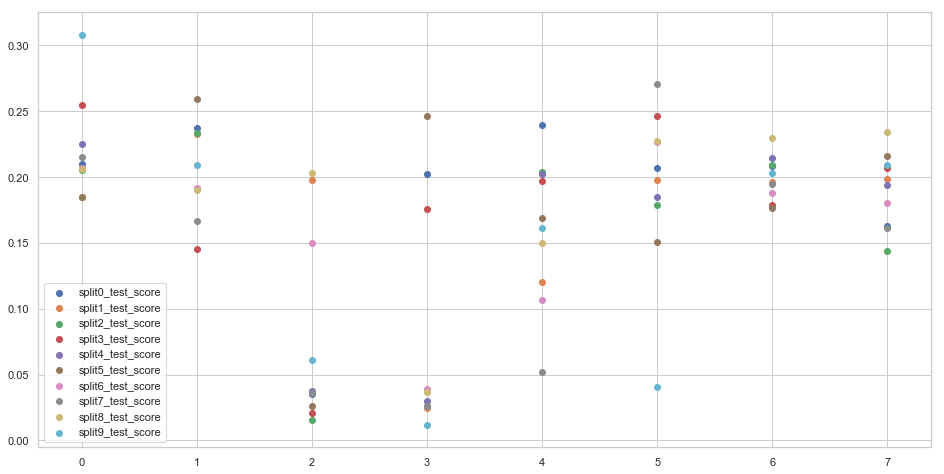

In [335]:
import numpy as np
import matplotlib.pyplot as plt
#https://matplotlib.org/gallery/lines_bars_and_markers/line_demo_dash_control.html#sphx-glr-gallery-lines-bars-and-markers-line-demo-dash-control-py
#main idea came from matplotlib example

x = result2.combo
y0 = result2.split0_test_score
y1 = result2.split1_test_score
y2 = result2.split2_test_score
y3 = result2.split3_test_score
y4 = result2.split4_test_score
y5 = result2.split5_test_score
y6 = result2.split6_test_score
y7 = result2.split7_test_score
y8 = result2.split8_test_score
y9 = result2.split9_test_score
fig, ax = plt.subplots()

# Using set_dashes() to modify dashing of an existing line
fig.set_size_inches(16, 8)
plt.scatter(x, y0, label='split0_test_score')#change from line to scatter plot from original example
plt.scatter(x, y1, label='split1_test_score')
plt.scatter(x, y2, label='split2_test_score')
plt.scatter(x, y3, label='split3_test_score')
plt.scatter(x, y4, label='split4_test_score')
plt.scatter(x, y5, label='split5_test_score')
plt.scatter(x, y6, label='split6_test_score')
plt.scatter(x, y7, label='split7_test_score')
plt.scatter(x, y8, label='split8_test_score')
plt.scatter(x, y9, label='split9_test_score')
ax.set_xticks(np.arange(len(x)))
ax.legend()
plt.show()

In [414]:
cb0 = result2.loc[result.combo == 0]
cb1 = result2.loc[result.combo == 1]
cb2 = result2.loc[result.combo == 2]
cb3 = result2.loc[result.combo == 3]
cb4 = result2.loc[result.combo == 4]
cb5 = result2.loc[result.combo == 5]
cb6 = result2.loc[result.combo == 6]
cb7 = result2.loc[result.combo == 7]

#mean score for all combo, average score for 10 fold
cb0mean = (cb0.split0_test_score + cb0.split1_test_score+cb0.split2_test_score+cb0.split3_test_score
           +cb0.split4_test_score+cb0.split5_test_score+cb0.split6_test_score
           +cb0.split7_test_score+cb0.split8_test_score+cb0.split9_test_score)/10
cb0mean = cb0mean.values
cb1mean = (cb1.split0_test_score + cb1.split1_test_score+cb1.split2_test_score+cb1.split3_test_score
           +cb1.split4_test_score+cb1.split5_test_score+cb1.split6_test_score
           +cb1.split7_test_score+cb1.split8_test_score+cb1.split9_test_score)/10
cb1mean = cb1mean.values
cb2mean = (cb2.split0_test_score + cb2.split1_test_score+cb2.split2_test_score+cb2.split3_test_score
           +cb2.split4_test_score+cb2.split5_test_score+cb2.split6_test_score
           +cb2.split7_test_score+cb2.split8_test_score+cb2.split9_test_score)/10
cb2mean = cb2mean.values
cb3mean = (cb3.split0_test_score + cb3.split1_test_score+cb3.split2_test_score+cb3.split3_test_score
           +cb3.split4_test_score+cb3.split5_test_score+cb3.split6_test_score
           +cb3.split7_test_score+cb3.split8_test_score+cb3.split9_test_score)/10
cb3mean = cb3mean.values
cb4mean = (cb4.split0_test_score + cb4.split1_test_score+cb4.split2_test_score+cb4.split3_test_score
           +cb4.split4_test_score+cb4.split5_test_score+cb4.split6_test_score
           +cb4.split7_test_score+cb4.split8_test_score+cb4.split9_test_score)/10
cb4mean = cb4mean.values
cb5mean = (cb5.split0_test_score + cb5.split1_test_score+cb5.split2_test_score+cb5.split3_test_score
           +cb5.split4_test_score+cb5.split5_test_score+cb5.split6_test_score
           +cb5.split7_test_score+cb5.split8_test_score+cb5.split9_test_score)/10
cb5mean = cb5mean.values
cb6mean = (cb6.split0_test_score + cb6.split1_test_score+cb6.split2_test_score+cb6.split3_test_score
           +cb6.split4_test_score+cb6.split5_test_score+cb6.split6_test_score
           +cb6.split7_test_score+cb6.split8_test_score+cb6.split9_test_score)/10
cb6mean = cb6mean.values
cb7mean = (cb7.split0_test_score + cb7.split1_test_score+cb7.split2_test_score+cb7.split3_test_score
           +cb7.split4_test_score+cb7.split5_test_score+cb7.split6_test_score
           +cb7.split7_test_score+cb7.split8_test_score+cb7.split9_test_score)/10
cb7mean = cb7mean.values


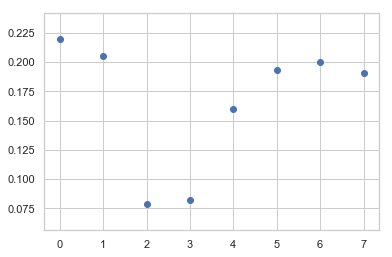

In [416]:
#mean score for all combo
xc = [cb0mean,cb1mean,cb2mean,cb3mean,cb4mean,cb5mean,cb6mean,cb7mean]
s = np.stack(xc, axis=0 )

plt.scatter(x = result2.combo, y=s)

combo 0,1 is linear; combo 2,3 is sigmoid; combo 4,5 is relu; combo 6,7 is silu.

From plot we can see that, both silu and relu have higher average score than sigmoid. But linear have higher score than silu and relu.